<a href="https://colab.research.google.com/github/isabelapt/covid19-analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 1 - Bootcamp Data Science Aplicada

***

Author: Isabela Pamplona Trindade\
Email: isabelaptrindade@gmail.com

## Analysis Context

On January 26, 2020, Brazil registered your [first case of covid](https://agenciabrasil.ebc.com.br/saude/noticia/2021-02/primeiro-caso-de-covid-19-no-brasil-completa-um-ano), a citizen of São Paulo who had traveled to Italy.

Because it is a disease that is transmitted by a virus, in which it needs a host, a human being. It is important to analyze the occurrences of nearby states geographically. If the movement of people between the state borders is significant, a group of infected people can transmit the virus from that region, increasing the number of cases and possibly the number of hospitalizations.








## Describing Datasets

1.   **HOSPITALIZATIONS DUE COVID 19**\
Procedimentos hospitalares do SUS - por local de internação - Brasil\
Internações por Região/Unidade da Federação e Ano/mês processamento\
Procedimento: 0303010223 TRATAMENTO DE INFECÇÃO PELO CORONAVIRUS – COVID 19\
Período:Jan/2008-Mar/2021\
SOURCE: [TABNET](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def)

2.   **ESTIMATED POPULATION in BRAZIL**\
SOURCE: [SIDRA](https://sidra.ibge.gov.br/tabela/6579)\
Download from [Github](https://raw.githubusercontent.com/isabelapt/Bootcamp_Data_Science_Alura/main/data/tabela6579.csv)



## Importing libraries

In [649]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Reading datasets from Github

### HOSPITALIZATION DUE COVID19

* The first period of time is 2020/April and the last period is 2021/March.
* It is avaiable the total of hospital internment due COVID19 along the entire period (2020/April - 2021/March) per federation unit. 
* Also, it is avaiable the total of hospital internment due COVID19 cases of all federation units per period of time.
* '-' ==>  Numerical data not available.


In [650]:
URI = "https://raw.githubusercontent.com/isabelapt/covid19-analysis/main/data/A132713189_28_143_208.csv"
covid19_data = pd.read_csv(URI, encoding="ISO-8859-1", skiprows = 4, skipfooter=11, sep=";",                     
                    thousands=".", decimal=",", engine='python')
print(covid19_data.head(5))
print(covid19_data.tail(5))
print(covid19_data.info)

  Unidade da Federação 2020/Abr  2020/Mai  ...  2021/Fev  2021/Mar  Total
0          11 Rondônia       47       329  ...       898      1232   7975
1              12 Acre        2        27  ...       428       457   2657
2          13 Amazonas      202      1845  ...      3851      4137  24428
3           14 Roraima        2       252  ...       635       600   3234
4              15 Pará      110      2159  ...      1986      2750  25810

[5 rows x 14 columns]
     Unidade da Federação 2020/Abr  2020/Mai  ...  2021/Fev  2021/Mar   Total
23  50 Mato Grosso do Sul        4        18  ...      1028      1533    8184
24         51 Mato Grosso        7        58  ...      1412      2110   14626
25               52 Goiás        7       104  ...      2698      3775   25184
26    53 Distrito Federal       45       390  ...      1004      2247   13603
27                  Total     4135     33075  ...     74193    123346  739382

[5 rows x 14 columns]
<bound method DataFrame.info of       Unid

### POPULATION

In [651]:
URI = "https://raw.githubusercontent.com/isabelapt/Bootcamp_Data_Science_Alura/main/data/tabela6579.csv"
population_data = pd.read_csv(URI, skiprows = 3, skipfooter=92, sep=";",                     
                    thousands=".", decimal=",", engine='python')
population_data = population_data.set_index('Brasil, Grande Região e Unidade da Federação')
population_data_2020 = population_data["2020"]
population_data_2020

Brasil, Grande Região e Unidade da Federação
Brasil                 211755692
Norte                   18672591
Nordeste                57374243
Sudeste                 89012240
Sul                     30192315
Centro-Oeste            16504303
Rondônia                 1796460
Acre                      894470
Amazonas                 4207714
Roraima                   631181
Pará                     8690745
Amapá                     861773
Tocantins                1590248
Maranhão                 7114598
Piauí                    3281480
Ceará                    9187103
Rio Grande do Norte      3534165
Paraíba                  4039277
Pernambuco               9616621
Alagoas                  3351543
Sergipe                  2318822
Bahia                   14930634
Minas Gerais            21292666
Espírito Santo           4064052
Rio de Janeiro          17366189
São Paulo               46289333
Paraná                  11516840
Santa Catarina           7252502
Rio Grande do Sul       1142297

## Exploring the datasets


***Dictionary used to classify by region***

In [652]:
dict_region = {"1":"Norte",
               "2":"Nordeste",
               "3":"Sudeste",
               "4":"Sul",
               "5":"Centro-Oeste",
               "T": "NA"}

###COVID19
* Set a new index as the "Unidade da Federação"
* Replace '-' by 0 number to convert all the column to int type not object type
* Replace 0 by NaN
* Classify the UF per region, creating column "Região"
* Analyze the growth of hospitalizations from 2021/Jan to 2021/Mar by each state

In [653]:
covid19_data = covid19_data.set_index("Unidade da Federação")

In [654]:
covid19_data = covid19_data.replace('-',0)
covid19_data = covid19_data.astype('int64')
covid19_data = covid19_data.replace(0,np.nan)

# covid19_data["2020/Abr"] is float64 because of NaN
pd.options.display.float_format = "{:.0f}".format # Display w/o decimals
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 11 Rondônia to Total
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2020/Abr  27 non-null     float64
 1   2020/Mai  28 non-null     int64  
 2   2020/Jun  28 non-null     int64  
 3   2020/Jul  28 non-null     int64  
 4   2020/Ago  28 non-null     int64  
 5   2020/Set  28 non-null     int64  
 6   2020/Out  28 non-null     int64  
 7   2020/Nov  28 non-null     int64  
 8   2020/Dez  28 non-null     int64  
 9   2021/Jan  28 non-null     int64  
 10  2021/Fev  28 non-null     int64  
 11  2021/Mar  28 non-null     int64  
 12  Total     28 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 3.1+ KB


In [655]:
region = [dict_region[idx[0]] for idx in covid19_data.index]

# Insert the data as the last column
covid19_data["Região"] = region

# Move Região Column to the be the first one
col = covid19_data.pop("Região")
covid19_data.insert(0,col.name, col)
covid19_data

,Região,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,
11 Rondônia,Norte,47,329,761,932,1012,709,366,315,483,891,898,1232,7975
12 Acre,Norte,2,27,224,296,262,175,200,153,227,206,428,457,2657
13 Amazonas,Norte,202,1845,3028,1929,1192,1305,1287,1574,1318,2760,3851,4137,24428
14 Roraima,Norte,2,252,497,283,158,114,89,123,181,300,635,600,3234
15 Pará,Norte,110,2159,4774,3375,3768,1994,1143,870,1079,1802,1986,2750,25810
16 Amapá,Norte,17,241,374,517,341,176,155,188,409,329,277,565,3589
17 Tocantins,Norte,6,79,200,469,684,626,448,71,85,54,83,283,3088
21 Maranhão,Nordeste,98,2623,4322,3535,2744,1751,1727,1289,1022,1454,1659,3705,25929
22 Piauí,Nordeste,29,298,865,1801,2313,1506,1284,1023,1037,1247,912,1665,13980


**Total of hospital internment due COVID19 along the entire period (2020/April - 2021/March)**

In [656]:
covid19_data_total = covid19_data["Total"]["Total"]

**ANALYSIS BY REGION**

In [657]:
# Grouping and Summing by region
covid19_data_region = covid19_data[0:27].groupby('Região').sum()
covid19_data_total_sortebyRegion = covid19_data_region.sort_values("Total",axis=0,ascending=False)

# Find Percentage of each region to the total
temp = (covid19_data_region["Total"]/covid19_data_total)*100
covid19_data_region_percentage = temp.sort_values(ascending=False)

**SORT VALUES BASES ON THE TOTAL OF EACH UF**

In [658]:
covid19_data_sorted_totalbyUF = covid19_data.iloc[0:28,1:].sort_values("Total",axis=0,ascending=False,
                                                                      na_position = 'last')

covid19_data_totalUF = covid19_data_sorted_totalbyUF.loc[:,"Total"]

# Drop Total from DataFrames
covid19_data_sorted_totalbyUF = covid19_data_sorted_totalbyUF.drop("Total", axis = 1)
covid19_data_sorted_totalbyUF = covid19_data_sorted_totalbyUF.drop("Total", axis = 0)

# Values in Percentage
covid19_data_totalbyUF_percentage = (covid19_data_totalUF/covid19_data_total)*100
covid19_data_totalbyUF_percentage.head()

Unidade da Federação
Total                  100
35 São Paulo            23
31 Minas Gerais          9
33 Rio de Janeiro        8
43 Rio Grande do Sul     6
Name: Total, dtype: float64

**SORT THE VALUES BASED ON THE TOTAL OF EACH PERIOD**

In [659]:
covid19_data_sorted_totalbyPeriod = covid19_data.iloc[:,1:14].sort_values("Total",axis=1,ascending=False,
                                                                          na_position = 'last') 

# Drop Total from DataFrames
covid19_data_sorted_totalbyPeriod = covid19_data_sorted_totalbyPeriod.drop("Total", axis = 0)
covid19_data_sorted_totalbyPeriod = covid19_data_sorted_totalbyPeriod.drop("Total", axis = 1)
covid19_data_sorted_totalbyPeriod.head()

# Values in Percentage
covid19_data_totalPeriod_percentage = (covid19_data.loc["Total","2020/Mai":"2021/Mar"]/covid19_data_total)*100

In [660]:
growth21_covid19_data =(covid19_data["2020/Mai"]/covid19_data["2021/Mar"])*100
growth21_covid19_data_sorted = growth21_covid19_data.loc["11 Rondônia ":"53 Distrito Federal"].sort_values(ascending=False)
growth21_covid19_data_sorted

Unidade da Federação
15 Pará                  79
21 Maranhão              71
33 Rio de Janeiro        65
26 Pernambuco            63
13 Amazonas              45
23 Ceará                 45
16 Amapá                 43
14 Roraima               42
35 São Paulo             36
32 Espírito Santo        32
17 Tocantins             28
24 Rio Grande do Norte   27
22 Piauí                 18
53 Distrito Federal      17
29 Bahia                 16
25 Paraíba               13
27 Alagoas                8
43 Rio Grande do Sul      7
12 Acre                   6
28 Sergipe                6
42 Santa Catarina         6
31 Minas Gerais           4
41 Paraná                 4
52 Goiás                  3
51 Mato Grosso            3
50 Mato Grosso do Sul     1
dtype: float64

###POPULATION 2020
* Sort the total population by region
* Sort the total population by UF

In [661]:
population_data_2020Region = population_data_2020.loc["Norte":"Centro-Oeste"]
population_data_2020_sortbyRegion = population_data_2020Region.sort_values(ascending=False)
print(population_data_2020_sortbyRegion)

population_data_2020UF = population_data_2020.loc["Rondônia":"Distrito Federal"]
population_data_2020_sortbyUF= population_data_2020UF.sort_values(ascending=False)
print(population_data_2020_sortbyUF)

Brasil, Grande Região e Unidade da Federação
Sudeste         89012240
Nordeste        57374243
Sul             30192315
Norte           18672591
Centro-Oeste    16504303
Name: 2020, dtype: int64
Brasil, Grande Região e Unidade da Federação
São Paulo              46289333
Minas Gerais           21292666
Rio de Janeiro         17366189
Bahia                  14930634
Paraná                 11516840
Rio Grande do Sul      11422973
Pernambuco              9616621
Ceará                   9187103
Pará                    8690745
Santa Catarina          7252502
Maranhão                7114598
Goiás                   7113540
Amazonas                4207714
Espírito Santo          4064052
Paraíba                 4039277
Rio Grande do Norte     3534165
Mato Grosso             3526220
Alagoas                 3351543
Piauí                   3281480
Distrito Federal        3055149
Mato Grosso do Sul      2809394
Sergipe                 2318822
Rondônia                1796460
Tocantins               

## Visualizations

### Percentage of hospital internment due COVID19 along 2020/Mai - 2021/March

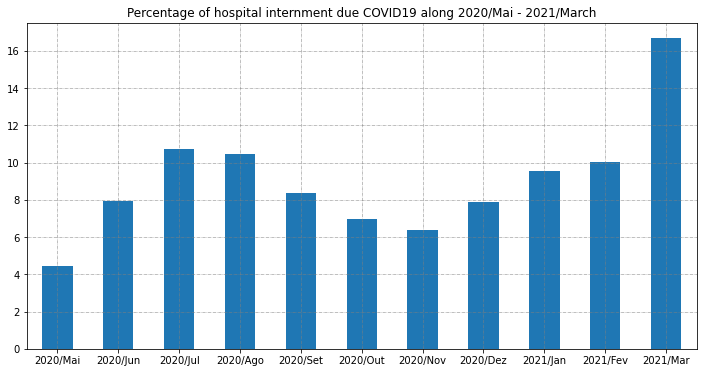

In [663]:
ax = covid19_data_totalPeriod_percentage.iloc[0:12].plot(figsize = (12,6),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0) 

plt.title("Percentage of hospital internment due COVID19 along 2020/Mai - 2021/March")
plt.show()

***From the bar plot above, it is possible to see that 2021/Mar was the period in which there were more hospital internment due COVID19. It is likely that the anticipated vacations of schools were an aggravating factor for the large increase in hospitalizations in July and August.The same happened in 2021, due the the festivities at the end of the year.***

### Total hospital internments due COVID19 along 2020/April - 2021/March in each region

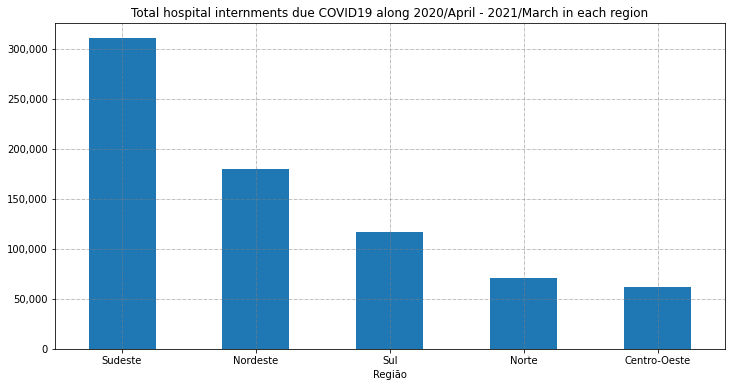

In [664]:
ax = covid19_data_total_sortebyRegion["Total"].plot(figsize = (12,6),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0) 

plt.title("Total hospital internments due COVID19 along 2020/April - 2021/March in each region")
plt.show()

In [ ]:

ax = .plot(figsize = (12,6),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0) 

plt.title("Total hospital internments due COVID19 along 2020/April - 2021/March in each region")
plt.show()

***Analyzing by Regions I can say that the number of hospital internment due COVID19 is proportional to the population estimated (ref:2020) in each region.***

### Evolution of the number of hospitalizations due to covid19 in each state, between 2020/Mai and 2021/Mar period

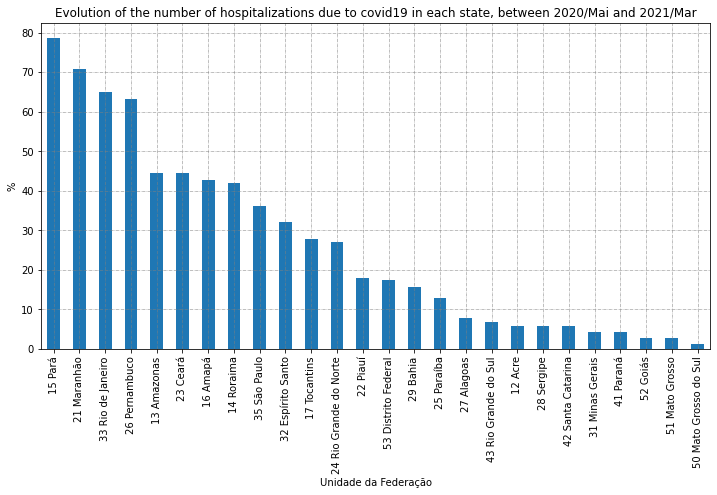

In [665]:
ax = growth21_covid19_data_sorted.plot(figsize = (12,6),kind='bar')

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_xticklabels(ax.get_xticklabels()) 

ax.set_ylabel("%")


plt.title("Evolution of the number of hospitalizations due to covid19 in each state, between 2020/Mai and 2021/Mar")
plt.show()

***Among the five states with the greatest increase in the number of hospitalizations, three (Pará, Maranhão and Amazonas) of them are close geographically.***

### Comparing the time evolution of covid19 hospitalizations (Pará, Maranhão e Amazonas)


***I choose those three states to check if they share some peaks during the period of time 2020/Mai and 2021/March. The behavior of the hospitalization is similar among these states, both of them have a peak in 2020/Jun and share the same tendency of increasing.***

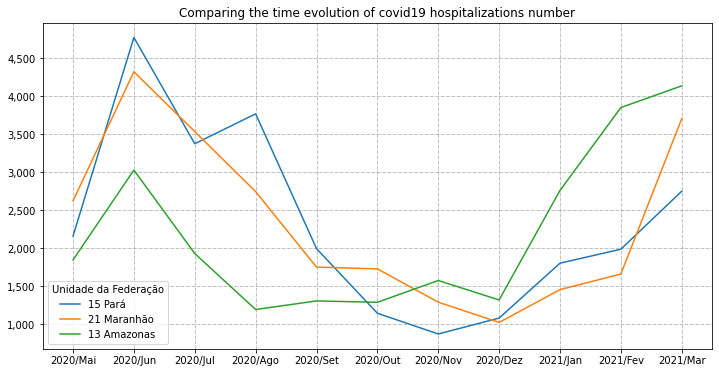

In [666]:
plotdata = covid19_data.loc[["15 Pará","21 Maranhão","13 Amazonas"],"2020/Mai":"2021/Mar"]

# Create sequence frequency for xticks
x_sequence = range(0,len(plotdata.columns),1)

ax = plotdata.T.plot(figsize = (12,6), xticks = x_sequence)

# Draw grid lines with red color and dashed style
plt.grid(color='gray', linestyle='-.', linewidth=0.5)

# Muda o formato dos números mostrados no eixo y 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title("Comparing the time evolution of covid19 hospitalizations number")
plt.show()